# Laden

In [1]:
import jsonlines

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

import nltk                         # natural language toolkit


# Hier legen wir fest, welche Daten (Wahlperiode 19 oder 20) wir laden:
legislatur = 20

# Wir generieren eine leere Liste:
alleReden = []

# Wir öffnen den entsprechende File (Dateipfad anpassen!):
with jsonlines.open(f'../../data/speeches_{legislatur}.jsonl') as f:
    for line in f.iter():
        # Wir packen alles Zeile für Zeile zu unserer Liste:
        alleReden.append(line)

# Wir sortieren nach Datum:
alleReden.sort(key=lambda x: x['date'])

# Wir lassen uns zeigen, wie viele Reden enthalten sind.
print(f'Die Liste enthält {len(alleReden)} Reden')
# Neue Zeile auf der Konsole:
print(f'\n')


Die Liste enthält 10791 Reden




# Suche nach Reden einer Person und Visualisierung als Word Cloud

Die Suche nach "Bernd Rützel" ergab 9 Reden




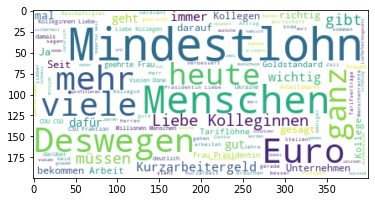

In [2]:
person = 'Bernd Rützel'

untermenge = [ rede for rede in alleReden if person in rede['name']]

print(f'Die Suche nach "{person}" ergab {len(untermenge)} Reden')
print(f'\n')

textlist = [rede['text'] for rede in untermenge]
text = " ".join(textlist)

german_stop_words = nltk.corpus.stopwords.words('german')

# Generate a word cloud image
wordcloud = WordCloud(stopwords = german_stop_words, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.show()


In [3]:
print(untermenge[1])

{'text': 'Sehr geehrter Herr Präsident! Liebe Kolleginnen! Liebe Kollegen! Trotz aller Herausforderungen durch Putins Krieg in der Ukraine ist es wichtig, dass wir unsere Aufgaben, die wir uns vor dem 24. Februar dieses Jahres vorgenommen haben, weiterhin beackern. Äußere Sicherheit und innere Sicherheit sind genauso wichtig wie soziale Sicherheit, und deswegen erhöhen wir den Mindestlohn zum 1. Oktober auf 12 Euro. 6,2 Millionen Menschen profitieren davon. Wir begegnen ihnen täglich, wir kennen sie: Es ist die Verkäuferin in der Bäckerei. Es ist der Reiniger, der die Büros, die Bahnen und die Busse saubermacht. Hubertus Heil, unser Minister, hat ganz viele Beispiele genannt: die Friseurin, die Boten, die uns die Pakete liefern, usw. All das sind die Menschen, denen wir Respekt zollen müssen, denen wir dankbar sein müssen, dass unser Leben, so wie wir es kennen, läuft. Das sind die Menschen, die früh aufstehen, die abends noch tätig sind, die in der Nachtschicht sind, die hart arbeiten